В этом дз необходимо обучить модели для классификации. Cегодня попробуем отличать настоящие новости от фейковых



In [8]:
# ячейка импортов

import numpy as np
import pandas as pd

# импорт моделей
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report # табличка с метриками

import matplotlib.pyplot as plt
from collections import Counter

# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline 

# Exploratory Data Analysis (EDA)



In [11]:
! unzip "news_fake-n-true.csv.zip"

Archive:  news_fake-n-true.csv.zip
  inflating: news_fake-n-true.csv    
  inflating: __MACOSX/._news_fake-n-true.csv  


In [12]:
data = pd.read_csv("news_fake-n-true.csv")
data.head(4)

,Unnamed: 0,title,text,subject,date,label
0,0,ADVISORY: Story on Kushner visiting Iraq withd...,(Reuters) - The story “Trump son-in-law Jared ...,politicsNews,"April 3, 2017",1
1,1,Kasich campaign denies report of Romney endors...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 14, 2016",1
2,2,WATCH: Colbert Devises Perfect Advertisement ...,If America is going to end the day Donald Trum...,News,"May 20, 2016",0
3,3,Trump says hopes for Cuban 'freedom' after Cas...,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",politicsNews,"November 26, 2016",1


**колонка label отвечает за тип новости: настоящие имеют лейбл 1,  фейковые новости -- с лейблом 0** 

In [13]:
# создадим новый датафрейм из старого

data_clean = data.drop(['Unnamed: 0','title','subject','date'], axis=1)

display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


распределение настоящих и фейковых новостей примерно равное

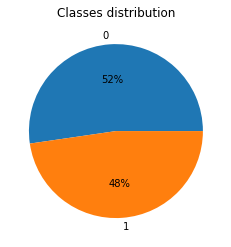

In [14]:
classes =pd.value_counts(data_clean["label"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')

plt.show()

**давайте попробуем предсказать:** окажется ли текст настоящей новостью или фейковой

- Векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку

Попробуйте обучить разные модели для классификации на данных
1. Naive Bayes
2. SVM 
3. Decision Trees
4. Random Forest
5. Boosting

Для каждой модели посмотрите на метрики с помощью функции [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Какая/какие модель/ли справляются с задачей наиболее эффективно?